In [0]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

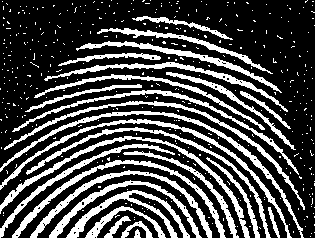

In [2]:
img = cv2.imread("fp.tif", 0)
cv2_imshow(img)

In [3]:
SE = np.ones((3,3), dtype=int)
SE

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [0]:
def erode(img, SE, iterations):
  pad_rows=int((SE.shape[0]-1)/2)
  pad_cols=int((SE.shape[1]-1)/2)
  SE = SE * 255 
  padImg = cv2.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)
  
  for iter in range(iterations):
    res_img = np.zeros(img.shape,dtype=int)
    for row in range(img.shape[0]):
      for col in range(img.shape[1]):
        if(padImg[row][col] != 0):
          flag = 1
          for row_fil in range(SE.shape[0]):
            for col_fil in range(SE.shape[1]):
              if(SE[row_fil,col_fil] != padImg[row_fil+row,col_fil+col] and SE[row_fil,col_fil] ==255):
                flag = 0;
                break;
          if(flag == 1):
            res_img[row,col]= 255
    padImg = cv2.copyMakeBorder(res_img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)
    
        
  return res_img

In [0]:
ret, binImg = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

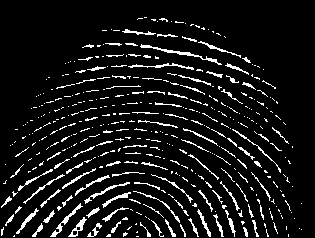

In [129]:
ero_img = erode(img, SE, iterations =1)
cv2_imshow(ero_img)

In [0]:
def dilate(img, SE, iterations):
  pad_rows=int((SE.shape[0]-1)/2)
  pad_cols=int((SE.shape[1]-1)/2)
  SE = SE * 255 
  padImg = cv2.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)
  
  for iter in range(iterations):
    res_img = np.zeros(img.shape,dtype=int)
    for row in range(img.shape[0]):
      for col in range(img.shape[1]):
        flag=0
        for row_fil in range(SE.shape[0]):
          for col_fil in range(SE.shape[1]):
            if( SE[row_fil,col_fil] == 255 and (SE[row_fil,col_fil] == padImg[row_fil+row,col_fil+col])):
              flag = 1;
              break;
        if(flag == 1):
          res_img[row,col]= 255
    padImg = cv2.copyMakeBorder(res_img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)
    
        
  return res_img

iteration


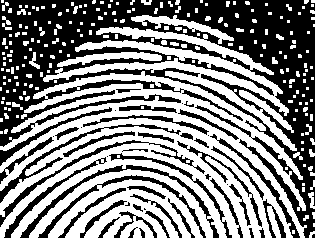

In [90]:
# Dilating the original finger prints image
dil_img = dilate(img , SE, 1)
cv2_imshow(dil_img)

iteration


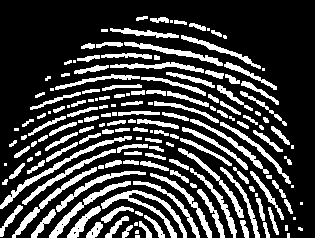

In [91]:
# Now dilate the previous eroded image
dil_ero_img = dilate(ero_img, SE, 1)  
cv2_imshow(dil_ero_img)

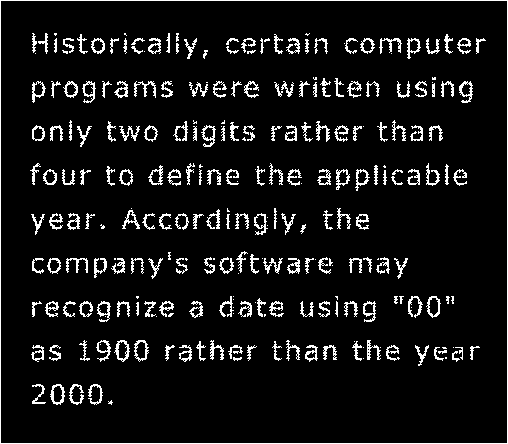

In [84]:
broken_text_img = cv2.imread("broken_text.tif", 0)
ret, broken_text_img = cv2.threshold(broken_text_img,127,255,cv2.THRESH_BINARY)
cv2_imshow(broken_text_img)

iteration


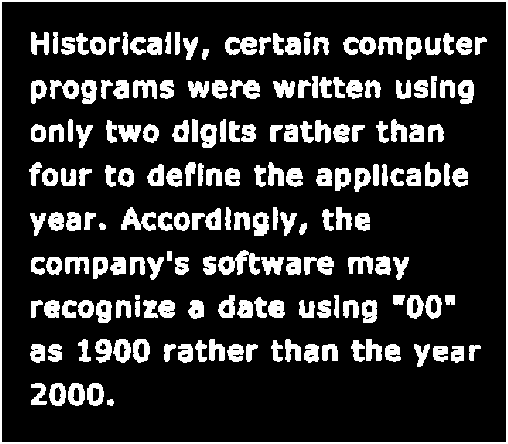

In [92]:
dil_text_img = dilate(broken_text_img, SE, 1)
cv2_imshow(dil_text_img)


In [0]:
SE2 = np.array(([0 , 0, 0],
              [1, 1, 1],
              [0, 0, 0]), dtype='uint8')

SE3 = np.array(([0 , 1, 0],
              [1, 1, 1],
              [0, 1, 0]),dtype='uint8')

SE4 = np.array(([1 , 0, 1],
              [0, 1, 0],
              [1, 0, 1]), dtype='uint8')


SE5 = np.array(([1 , 1, 1],
              [0, 0, 0],
              [1, 1, 1]), dtype='uint8')

SE6 = np.array(([1 , 0, 1],
              [1, 1, 1],
              [1, 0, 1]), dtype='uint8')


iteration


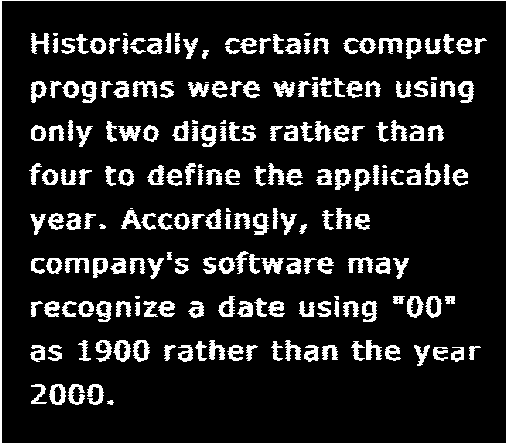

In [99]:
dil_text_img = dilate(broken_text_img, SE2, 1)
cv2_imshow(dil_text_img)


iteration


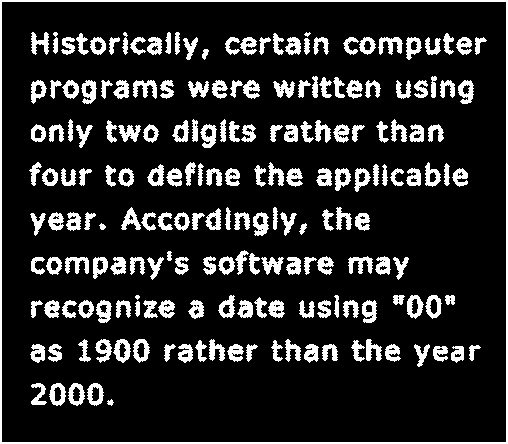

In [98]:
dil_text_img = dilate(broken_text_img, SE3, 1)
cv2_imshow(dil_text_img)


iteration


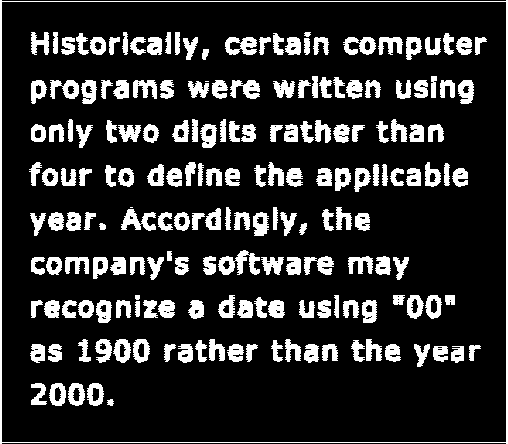

In [100]:
dil_text_img = dilate(broken_text_img, SE4, 1)
cv2_imshow(dil_text_img)


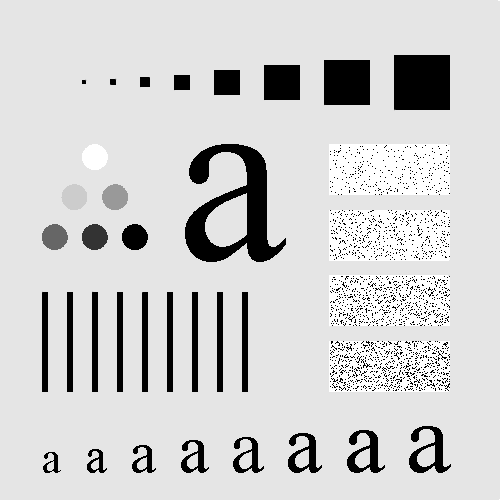

In [102]:
fig_img = cv2.imread("Fig01.tif", 0 )
cv2_imshow(fig_img)

iteration


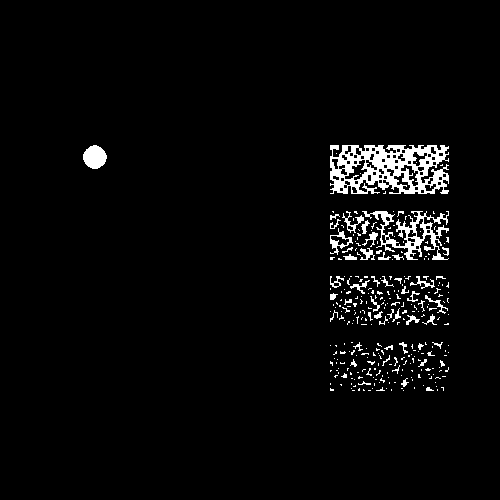

In [104]:
fig_ero_img = erode(fig_img, SE , 1)
cv2_imshow(fig_ero_img)

iteration


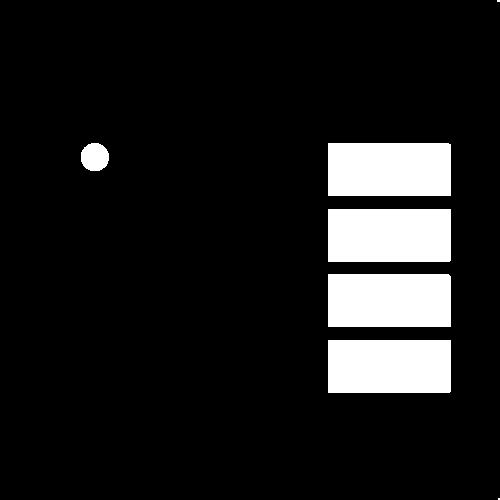

In [118]:
fig_dil_img = dilate(fig_img, SE, 1)
cv2_imshow(fig_dil_img)

In [0]:

  def dilate2(img, SE, iterations):
  pad_rows=int((SE.shape[0]-1)/2)
  pad_cols=int((SE.shape[1]-1)/2)
  SE = SE * 255 
  padImg = cv2.copyMakeBorder(img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)
  max_val = np.max(img)
  for iter in range(iterations):
    res_img = np.full(img.shape, np.min(img), dtype=int)
    for row in range(img.shape[0]):
      for col in range(img.shape[1]):
        flag=0
        for row_fil in range(SE.shape[0]):
          for col_fil in range(SE.shape[1]):
            if( SE[row_fil,col_fil] == 255 and  padImg[row_fil+row,col_fil+col] == max_val):
              flag = 1;
              break;
        if(flag == 1):
          res_img[row,col]= max_val
    padImg = cv2.copyMakeBorder(res_img, pad_rows, pad_rows, pad_cols, pad_cols, cv2.BORDER_CONSTANT ,0)

        
  return res_img 

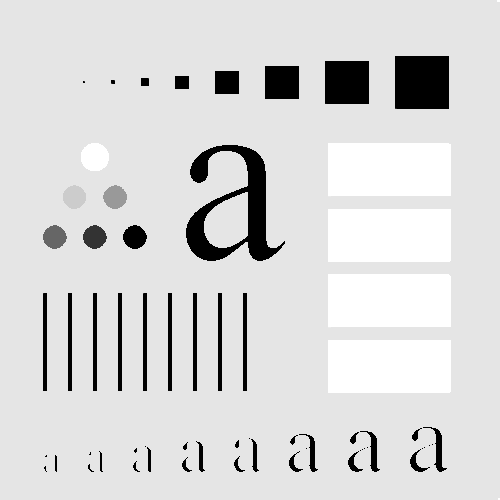

In [107]:
cv2_imshow(cv2.dilate(fig_img, SE, 1))

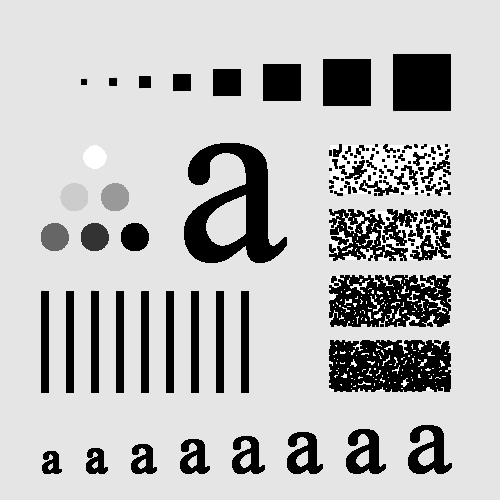

In [119]:
cv2_imshow(cv2.erode(fig_img, SE, 1))

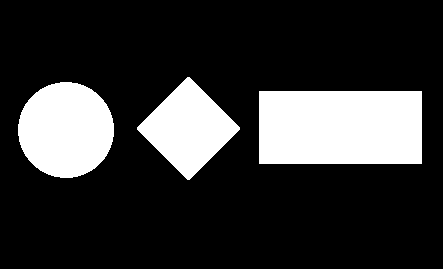

In [120]:
objects_img = cv2.imread("Objects.png", 0)
cv2_imshow(objects_img)

In [250]:
SE4

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=uint8)

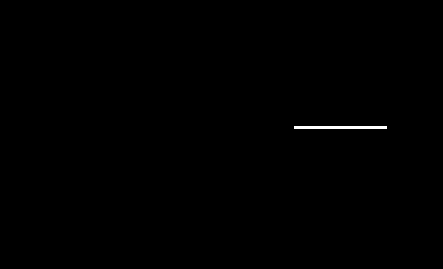

In [153]:
rectangle = (erode(objects_img, SE4,35 ))
cv2_imshow(rectangle)

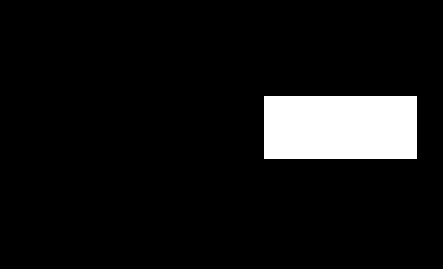

In [156]:
rectangle = dilate(rectangle , SE , 20)
cv2_imshow(rectangle)

In [0]:
SE5 = np.array(([1 , 1, 1],
              [1, 0, 1],
              [1, 1, 1]), dtype='uint8')


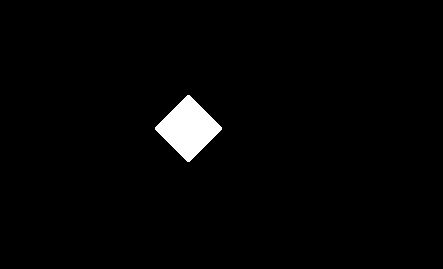

In [183]:
star = cv2.erode(objects_img, SE3,iterations=48)
star = cv2.dilate(star, SE3, iterations=30 )
cv2_imshow(star)

In [212]:
print(SE3)
SE4

[[0 1 0]
 [1 1 1]
 [0 1 0]]


array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=uint8)

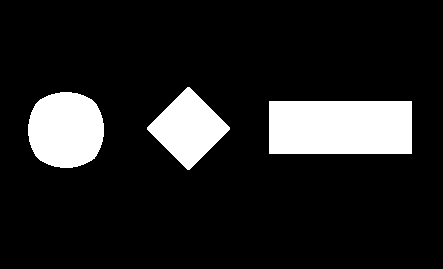

In [228]:
circle = cv2.erode(objects_img, SE3,iterations=10)
#circle = cv2.dilate(circle, SE3, iterations=30 )
cv2_imshow(circle)

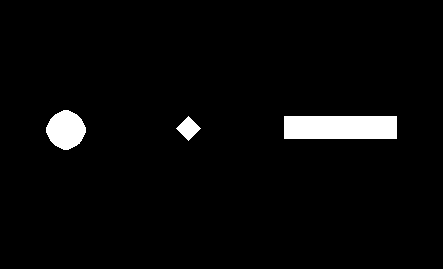

In [256]:
circle2 = cv2.erode(circle, SE4,iterations=15)
cv2_imshow(circle2)

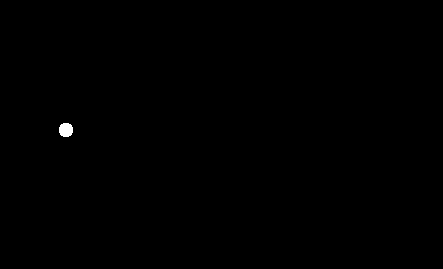

In [263]:
final_circle = cv2.erode(circle2, SE3, iterations=13 )
cv2_imshow(final_circle)